<a href="https://colab.research.google.com/github/AynaAraujo/Machine_Learning-Listas/blob/main/Lista_1_KNN(AYNA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
import pandas as pd

# **Atividade 1**

>**Implemente uma classe que corresponda ao KNN**

In [2]:
class KNN:
    def __init__(self, k):
        #K is the number of the neighbors
        self.k = k

    def fit(self, X_train, y_train):
        #Get the positions of the TRAINNING points
        self.X_train = X_train
        #Get the TRAINNING targets/labels
        self.y_train = y_train

    def predict(self, X_test, distance_metric):
        #Manhattan Distance
        if distance_metric == 'l1':
            dist_func = self._l1_distance
        #Euclidean Distance
        elif distance_metric == 'l2':
            dist_func = self._l2_distance
        else:
            raise ValueError("Métrica de distancia inválida. Escolha 'l1' ou 'l2'.")

        #Calls the predict function using the test points as  args
        predictions = [self._predict(x, dist_func) for x in X_test]
        return np.array(predictions)

    def _predict(self, x, dist_func):
        #
        # Escreva uma função que calcule as distancias entre o ponto de teste e os pontos de treinamento usando as funções de distância especificadas.
        # Nesta função deverá se identificar os k vizinhos mais próximos com base nessas distâncias, e determinar a classe mais comum entre esses vizinhos
        # retornando a classe como a previsão para o ponto de teste.

        #Get the distance between the x(X_test) and X_train points
        distances = dist_func(x, self.X_train)
        #Sort the distances array and get the k lowests values(the neighbors)
        neighbors = np.argsort(distances)[:self.k]
        #Get the labels/targets of the neighbors points
        targets = self.y_train[neighbors]
        #Use Counter to count the amount of which type of label and most_common to get the marjorite kind
        label = Counter(targets).most_common(1)

        return label[0][0]

    def _l1_distance(self, x1, x2):
        # Escreva uma função para calcular a distancia manhattan
        #D = |x2 -  x1| + |y2 -  y1|

       return np.sum(np.abs(x2 - x1), axis=1)



    def _l2_distance(self, x1, x2):
        # Escreva uma função para calcular a distancia euclidiana
        #D = sqrt(x^2 + y^2)

        return np.sqrt(np.sum(np.pow(x2 - x1,2), axis=1))



In [3]:
#Test Example

#Train data
X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])
y_train = np.array([2, 1, 1, 0])

#Test Data
X_test = np.array([[2, 3], [4, 5]])

#Calls the KNN
knn = KNN(k=3)
#Get the train data
knn.fit(X_train, y_train)

#Do the prediction
predictions = knn.predict(X_test, distance_metric='l1')
print(predictions)


[1 1]


# **Atividade 2 - Classificação com o dataset Breast cancer**

Features: Total de 30

Para essa atividade utilizar as features:
1. Mean radius
2. Mean texture
3. Mean perimeter
4. Mean area
5. Mean smoothness

Variável dependente: Presença de câncer de mama maligno ou benigno
1. 0:  Indica que o tumor é maligno (câncer de mama maligno).
2. 1: Indica que o tumor é benigno (câncer de mama benigno).


>**Treine os dados da base breast cancer utilizando o KNN implementado**

>**Faça as predições nos dados de teste e compare os dados reais com os preditos**


In [4]:
#Load the dataset
data = datasets.load_breast_cancer()
#Chosen features
colunas = ['Mean radius', 'Mean texture', 'Mean perimeter', 'Mean area', 'Mean smoothness']
#plot df
pd.DataFrame(data['data'][:, :5], columns=colunas)

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [5]:
#Seeing labels
targets = np.array(data.target_names)
print(targets)

['malignant' 'benign']


>**As 5 características do dataset Breast cancer possuem escalas diferentes, o que compromete a taxa de acerto. Crie abaixo novas classes KNN_Norm e DecisionTree_Norm para aplicar um algoritmo de normalização de características, refaça o treinamento com as novas classes e analise o impacto no resultado para os dois classificadores.**

Exemplos de algoritmos de normalização que podem ser utilizados:
1. Normalização Min-Max (Min-Max normalization): Este método dimensiona os dados para que fiquem dentro de um intervalo específico, geralmente entre 0 e 1.

2. Normalização pelo Max: Divide-se cada valor pelo maior valor da amostra. Este método será válido apenas em casos em que os valores forem sempre positivos.

3. Normalização Z-Score: Este método transforma os dados para que tenham uma média zero e um desvio padrão de 1.

>**Divida o dataset em treinamento, teste e validação. Com o conjunto de validação varie os hiperparâmetros dos classificadores implementados e indique os melhores hiperparâmetros.**

Para o KNN indique por exemplo qual o melhor K vizinho (3,5,10..), qual a melhor distância (euclidiana ou manhattan). Como métricas de avaliação podem utilizar recall,   precision e f-measure.


###KNN_Norm

In [6]:
from sklearn.preprocessing import StandardScaler
#Functions to scale
def scaler_Min_Max(X):
  X = np.array(X)
  #Get de min and max values
  X_min,X_max = X.min(axis=0), X.max(axis=0)
  #Gets the scale
  X_scaled = (X -X_min)/(X_max - X_min)

  return X_scaled

def scaler_Z_score(X):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  return np.array(X_scaled)

In [7]:
from sklearn.model_selection import train_test_split


class KNN_Norm(KNN):
  def __init__(self,k,seed,train_size,test_size,distance_metric):
    super().__init__(k)
    self.seed = seed #Chooses the random seed
    self.train_size =train_size
    self.test_size =test_size
    self.distance_metric =distance_metric

  #Devides the data in train,test and validation
  def fit(self,X,y,scaler):
    if scaler == 'Z_score':
      X_scaled = scaler_Z_score(X)
    elif  scaler == 'Min_Max':
      X_scaled = scaler_Min_Max(X)
    else:
      raise Exception('Scaler inválido')

    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled,y,test_size=self.train_size,random_state = self.seed)
    X_val, X_test,y_val, y_test = train_test_split(X_temp,y_temp,test_size=self.test_size,random_state= self.seed)

    self.X_train, self.y_train = X_train, y_train
    self.X_val, self.y_val = X_val, y_val
    self.X_test, self.y_test = X_test, y_test





##Sample Test

## Metrics vs K

In [25]:
import seaborn as sns
import plotly.express as px
from sklearn.metrics import f1_score, precision_score, recall_score

# load dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

#Parameters:
seed= 20
train_size = 0.5
test_size=0.3
distance_metric='l2'
scaler = 'Min_Max'

#Testing K values:
k_values = range(1,500,2) # To get only odd values
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
  knn_model = KNN_Norm(k=k, seed=seed, train_size=train_size, test_size=test_size, distance_metric=distance_metric)

  # Treinando modelo
  knn_model.fit(X, y, scaler)
  #Prediction
  y_pred = knn_model.predict(knn_model.X_val,distance_metric)

  #Metrics
  precision = precision_score(knn_model.y_val, y_pred)
  recall = recall_score(knn_model.y_val, y_pred)
  f1 = f1_score(knn_model.y_val, y_pred)
  #Save values
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

#Creatinf DF:
df = pd.DataFrame({
    'K': list(k_values) * 3,
    'Score': precision_scores + recall_scores + f1_scores,
    'Metric': ['Precision'] * len(k_values) + ['Recall'] * len(k_values) + ['F1-Score'] * len(k_values)
})


#Ploting Results
fig = px.line(df,x='K',y = 'Score',color='Metric',markers=True,
              title= 'Precision, Recall e F1-Score vs K',
              labels={'K':'Neighbors(K)','Score':'Metrics'},hover_name='Metric')
fig.show()




# **Atividade 3 - Classificação com o dataset Wine**

Features: Total de 13

Para essa atividade utilizar as features:
1. Teor alcoólico
2. Ácido málico
3. Cinzas

Variável dependente: Classe do vinho
1. Classe 0: Vinhos da primeira origem geográfica.
2. Classe 1: Vinhos da segunda origem geográfica.
3. Classe 2: Vinhos da terceira origem geográfica.


**Nesta atividade deverá ser executado o KNN, aplicado na base de dados Wine, com os seguintes características:**

- Gráfico 1.
- 1º teste: k=3, normalização min-max, distância L2
- 2º teste: k=3, normalização z-score (padronização), distância L2
- 3º teste: k=3, normalização z-score (padronização), distância L1
- 4º teste: k=3, normalização min-max (padronização), distância L1

- Gráfico 1.
- 1º teste: k=9, normalização min-max, distância L2
- 2º teste: k=9, normalização z-score (padronização), distância L2
- 3º teste: k=9, normalização z-score (padronização), distância L1
- 4º teste: k=9, normalização min-max (padronização), distância L1

In [11]:
data = datasets.load_wine()
colunas = ['Teor alcoólico', 'Acidez málica', 'Cinzas']
pd.DataFrame(data['data'][:, :3], columns=colunas)

,Teor alcoólico,Acidez málica,Cinzas
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [12]:
targets = data.target_names
print(targets)

['class_0' 'class_1' 'class_2']


##Graph 1

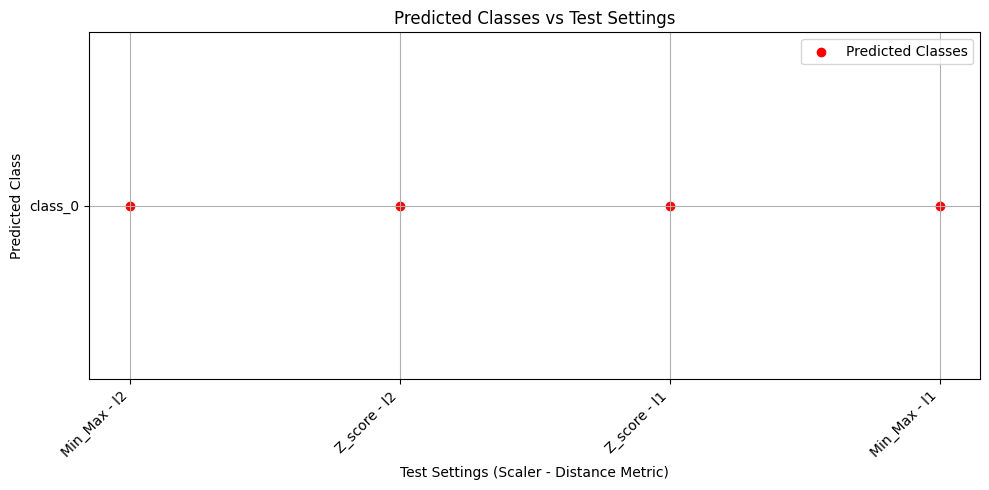

In [13]:
# 1º teste: k=3, normalização min-max, distância L2

# 2º teste: k=3, normalização z-score (padronização), distância L2

# 3º teste: k=3, normalização z-score (padronização), distância L1

# 4º teste: k=3, normalização min-max (padronização), distância L1


# load dataset
data = datasets.load_wine()
X, y = data.data, data.target

#Parameters:
seed= 20
train_size = 0.5
test_size=0.3

# Testes
k_values = [3, 3, 3, 3]
tests = [
    [3, 'Min_Max', 'l2'],
    [3, 'Z_score', 'l2'],
    [3, 'Z_score', 'l1'],
    [3, 'Min_Max', 'l1']
]
#Targets Predictions:
targets = []
class_names = data.target_names

for n in tests:
  k, scaler, distance_metric = n
  knn_model = KNN_Norm(k=k, seed=seed, train_size=train_size, test_size=test_size, distance_metric=distance_metric)

  # Treinando modelo
  knn_model.fit(X, y, scaler)
  #Prediction
  y_pred = knn_model.predict(knn_model.X_val,distance_metric)


  predict_classes = [class_names[label] for label in y_pred]
  targets.append(predict_classes)



#Ploting results
plt.figure(figsize=(10, 5))
flat_targets = [targets[i][0] for i in range(len(targets))]
flat_tests = [f"{test[1]} - {test[2]}" for test in tests]

plt.scatter(flat_tests, flat_targets, marker='o', label='Predicted Classes', color='red')

plt.xlabel('Test Settings (Scaler - Distance Metric)')
plt.ylabel('Predicted Class')
plt.title('Predicted Classes vs Test Settings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [14]:
y_pred

array([0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1])

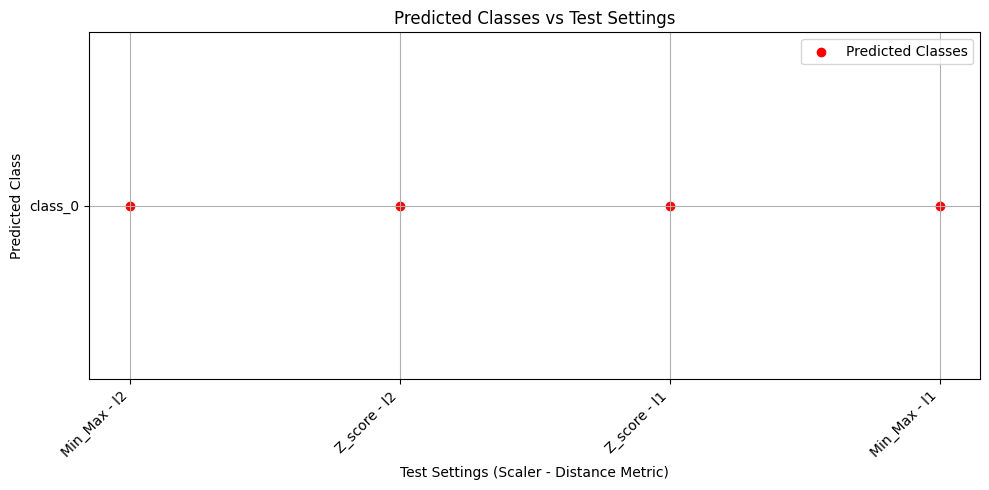

In [15]:
# 1º teste: k=9, normalização min-max, distância L2

# 2º teste: k=9, normalização z-score (padronização), distância L2

# 3º teste: k=9, normalização z-score (padronização), distância L1

# 4º teste: k=9, normalização min-max (padronização), distância L1


# load dataset
data = datasets.load_wine()
X, y = data.data, data.target

#Parameters:
seed= 20
train_size = 0.5
test_size=0.3

# Testes
k_values = [9, 9, 9, 9]
tests = [
    [9, 'Min_Max', 'l2'],
    [9, 'Z_score', 'l2'],
    [9, 'Z_score', 'l1'],
    [9, 'Min_Max', 'l1']
]
#Targets Predictions:
targets = []
class_names = data.target_names

for n in tests:
  k, scaler, distance_metric = n
  knn_model = KNN_Norm(k=k, seed=seed, train_size=train_size, test_size=test_size, distance_metric=distance_metric)

  # Treinando modelo
  knn_model.fit(X, y, scaler)
  #Prediction
  y_pred = knn_model.predict(knn_model.X_val,distance_metric)


  predict_classes = [class_names[label] for label in y_pred]
  targets.append(predict_classes)



#Ploting results
plt.figure(figsize=(10, 5))
flat_targets = [targets[i][0] for i in range(len(targets))]
flat_tests = [f"{test[1]} - {test[2]}" for test in tests]

plt.scatter(flat_tests, flat_targets, marker='o', label='Predicted Classes', color='red')

plt.xlabel('Test Settings (Scaler - Distance Metric)')
plt.ylabel('Predicted Class')
plt.title('Predicted Classes vs Test Settings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






In [16]:
k_values = [9, 9, 9, 9]
tests = [
    [9, 'Min_Max', 'l2'],
    [9, 'Z_score', 'l2'],
    [9, 'Z_score', 'l1'],
    [9, 'Min_Max', 'l1']
]
#Targets Predictions:
targets = []
class_names = data.target_names

for n in tests:
  k, scaler, distance_metric = n
  print(k, scaler, distance_metric)
  print('')

9 Min_Max l2

9 Z_score l2

9 Z_score l1

9 Min_Max l1

